# Laboratorio 2
## Procesamiento Digital de Señales
## 2023-2

Santiago Naranjo Sanchez

cc:1017267682

#Librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt #Librería para gráficas
from scipy.io.wavfile import read #Libreria para lectura de archivos de audio
from scipy.io.wavfile import write
from scipy.signal import resample
from IPython.display import Audio #Librería para escuchar las señales
pi = np.pi
%matplotlib inline

#2 Muestreo

# 1.
Cargue la señal correspondiente al ultimo numero de su cedula. Con base en el numero total de muestras
y a la frecuencia de muestreo, grafique la señal en funcion del tiempo.

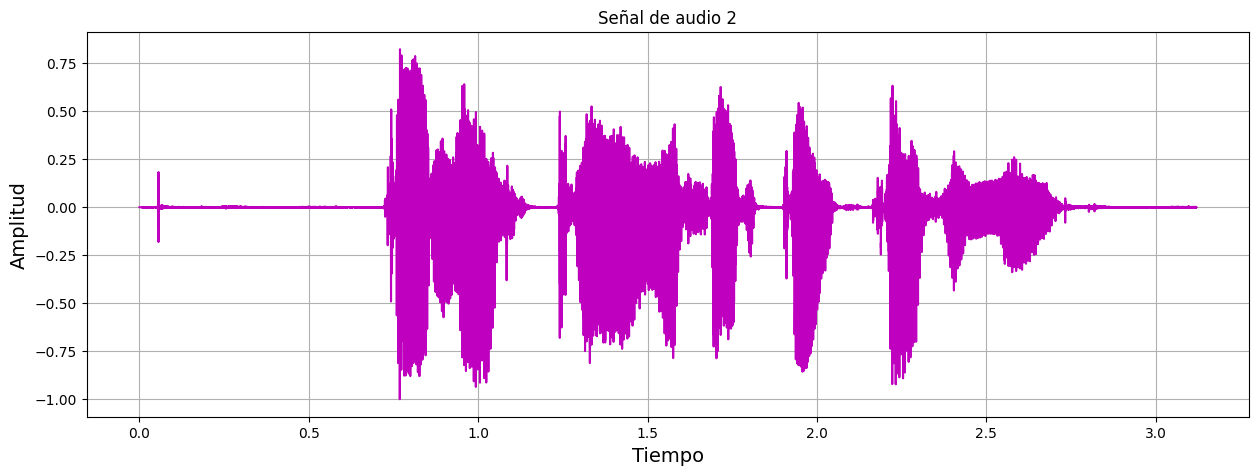

In [3]:
file_audio=("2.wav") # Ruta del archivo con la señal.
fs, x=read(file_audio) # Cargar el archivo y tomar su frecuencia máxima y sus valores.
x=x/float(max(abs(x))) #Normaliza la señal de audio
t=np.arange(0, float(len(x))/fs, 1.0/fs) # Vector de tiempo.

#Graficar la señal
plt.figure(figsize=(15,5))
plt.title("Señal de audio 2", fontsize=12)
plt.plot(t,x, color ='m')
plt.xlabel('Tiempo', fontsize=14)
plt.ylabel('Amplitud', fontsize=14)
plt.grid()
plt.show()

Audio(x, rate=fs) #Se escucha la señal.

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

#2.2


 Genere dos nuevos archivos de audio con la misma señal, utilizando primero el doble y luego la mitad
de la frecuencia de muestreo original, respectivamente. Escuche el audio, ¿Qué diferencia nota? ¿A qué
se debe esto?


In [ ]:
fs_doble = 2*fs #Se duplica la frecuencia
write ('2.1. wav ', fs_doble, x ) #Se guarda la nueva señal
Audio(x, rate=fs_doble) #Se escucha la señal.


In [ ]:
fs_doble = int(fs/2) #Se duplica la frecuencia
write ('2.1. wav ', fs_doble, x ) #Se guarda la nueva señal
Audio(x, rate=fs_doble) #Se escucha la señal.


La diferencia principal que se nota es que al usar el doble de la frecuencia  el audio se reproduce mas rapido de lo normal lo hace que se escuhe mas agudo,mientras que al usar la mitad de la frecuencia este se escucha mas grave, en ambos casos es mas dificil entender lo que se dice
Esto se debe al valor que toma la frecuncia,entre mas alta mas agudo y rapido se escucha

al duplicar la frecuencia de muestreo no cambia la duración real de la señal de audio ni su contenido, pero puede alterar la percepción auditiva, ya que la señal se reproducirá a una velocidad diferente debido a la mayor frecuencia de muestreo.

#2.3
 Sub-muestree la señal usando un cuarto de la frecuencia de muestreo original. Reproduzca la señal resultante
y la original, ambas usando una frecuencia de fs/4. Grafique ambas señales en la misma figura. ¿Que puede
concluir?

In [7]:
fs_nueva = int(fs/4) # frecuencia de fs/4.
senal2 = resample (x,int( len(x)/4))
Audio(x,rate=fs_nueva) #Se escucha la señal original a fs/4

In [ ]:
Audio(senal2, rate=fs_nueva) # Se escucha la nueva señal (Sub-muestreada) a fs/4

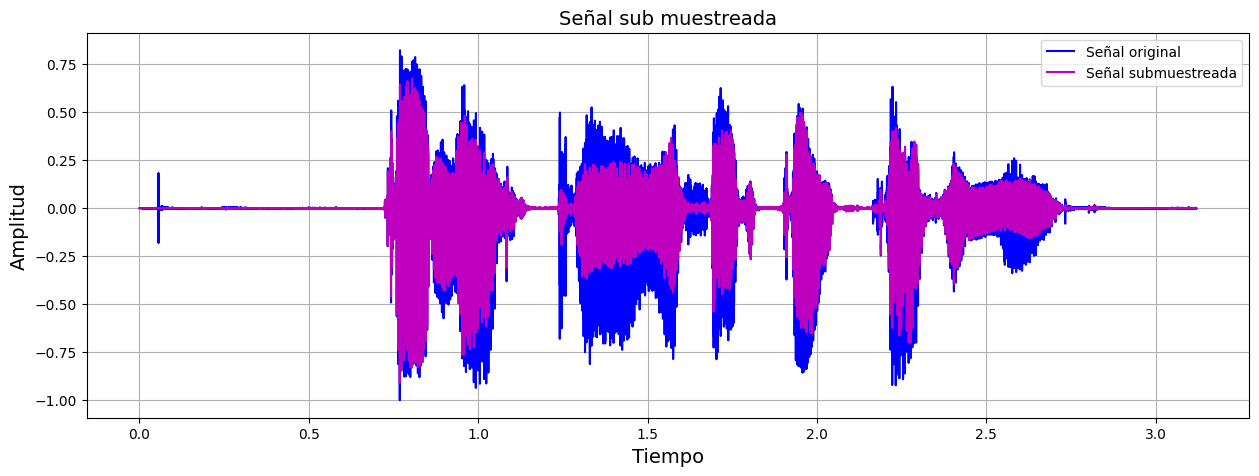

In [ ]:
tn=np.arange(0, float(len(x))/fs, 1.0/fs) # Vector de tiempo.
t1=np.arange(0, float(len(senal2))/fs_nueva, 1.0/fs_nueva) # Vector de tiempo.

#Graficar la señal
plt.figure(figsize=(15,5))
plt.title("Señal sub muestreada", fontsize=14)
plt.plot(tn,x, color ='b',label = 'Señal original')
plt.plot(t1,senal2, color ='m', label= 'Señal submuestreada')
plt.xlabel('Tiempo', fontsize=14)
plt.ylabel('Amplitud', fontsize=14)
plt.grid()
plt.legend()
plt.show()

¿Que puede concluir?
Al escuhar ambos audios no se nota casi diferencia,pero al ver sus graficas se puede ver como la señal sub muestrada pierde informacion

#3. Frecuencia de Nyquist y Aliasing


#3.1
Genere una señal sinusoidal con una frecuencia de 1 Hz y una frecuencia de muestreo de 20 Hz. Genere otra señal sinusoidal de frecuencia 1 Hz y muestréela según el teorema de Nyquist. Grafique señales en la misma figura. ¿Qué diferencias encuentras?

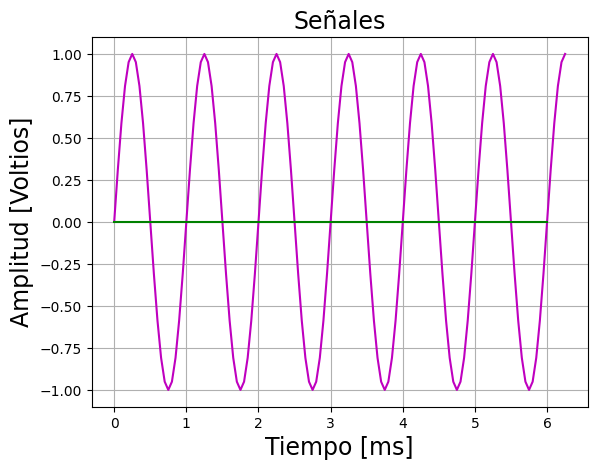

In [13]:
fs1= 20 #frecuencia de muestreo señal 1
f=1#Frecuencia de Nyquist
fs2 = 2*f #frecuencia de muestreo señal 2(Tasa Nyquist)

tn1 = np.arange(0, 2*pi, 1.0/fs1)
sg1 = np.sin(2*pi*f*tn1) #señal 1
tn2 = np.arange(0, 2*pi, 1.0/fs2)
sg2 = np.sin(2*pi*f*tn2)#señal 2


#Gráfica señales juntas
plt.title('Señales',fontsize=17)
plt.xlabel('Tiempo [ms]',fontsize=17)
plt.ylabel('Amplitud [Voltios]',fontsize=17)
plt.plot(tn1,sg1, color = 'm')
plt.plot(tn2, sg2, color ='g')
plt.grid()


plt.show()

La señal número 1 se ve como una sinusoial ya que se tienen más muestras, en la segunda se observa que no se cumple el teorema de nyquist para esta señal por lo que no se alcanza a distinguir

#3.2
Escriba un código que genere dos señales sinusoidales muestreadas con una frecuencia fs = (n + 1) ∗ 22 Hz.
La señal 1 tendrá una frecuencia f1 = (n + 1) Hz y la señal 2 tendrá una frecuencia f2 = 2 ∗ fs + (n + 2) Hz.
Tome n como ultimo dígito de su cédula.

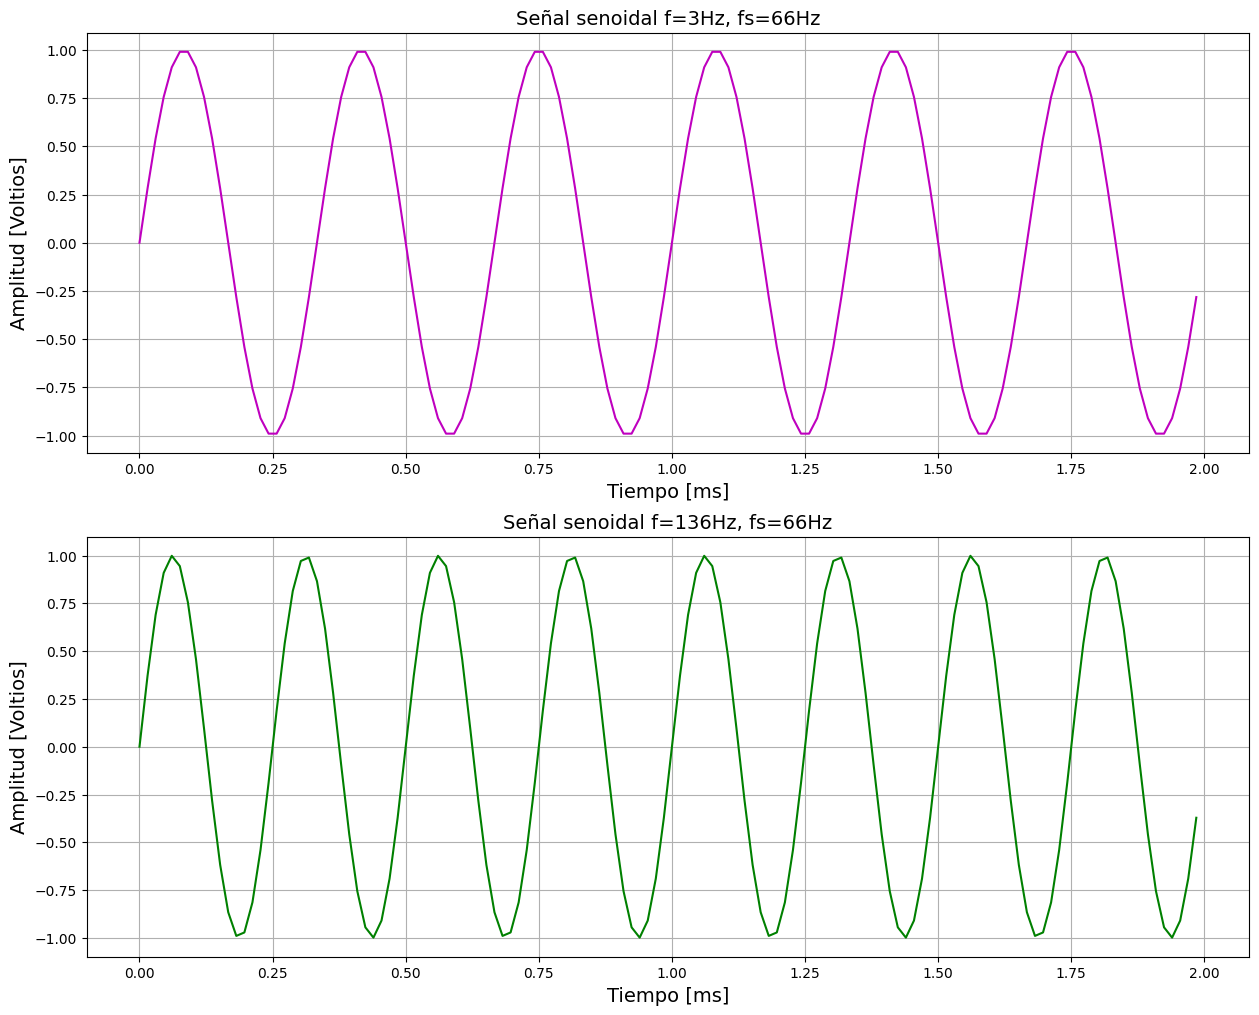

In [ ]:
n = 2; #Cedula terminada en 2.
fs=(n+1)*22 # Frecuencia de muestreo para ambas señales.
f_sig1 = n+1 #Frecuencia de la primera señal.
f_sig2 = 2*fs+(n+2) #Frecuencia de la segunda señal

t=np.arange(0, 2.0, 1.0/fs) # Vector de tiempo para ambas señales .

sig1 = np.sin(2*pi*f_sig1*t) #Señal #1.
sig2 = np.sin(2*pi*f_sig2*t) #Señal #2.

#Gráfica señal 1
plt.figure(figsize=(15, 12))
plt.subplot(2, 1, 1)
plt.title(f'Señal senoidal f={f_sig1}Hz, fs={fs}Hz',fontsize=14)
plt.xlabel('Tiempo [ms]',fontsize=14)
plt.ylabel('Amplitud [Voltios]',fontsize=14)
plt.plot(t,sig1, color = 'm')
plt.grid()

#Gráfica señal 2
plt.subplot(2, 1, 2)
plt.title(f'Señal senoidal f={f_sig2}Hz, fs={fs}Hz',fontsize=14)
plt.xlabel('Tiempo [ms]',fontsize=14)
plt.ylabel('Amplitud [Voltios]',fontsize=14)
plt.plot(t, sig2, color ='g')
plt.grid()

plt.show()

**¿Ambas señales quedan bien representadas. ¿A que se debe esto?.**

La primer señal queda bien representada ya que la frecuencia de muestreo es mayor y se cuemple el teorema de nyquist, en la segunda al ser la frecuencia de muestreo menor no se cumple el teorema. qy se produce aliansig


#4 Cuantificacion

**4.1** Use la función mostrada a continuación para re-cuantificar la señal de audio utilizada en los numerales anteriores
a 2, 4 y 12 bits. Escuche y grafique las señales re-cuantificadas. Compare gráficamente cada una de las
señales obtenidas con la señal original.

In [ ]:
def fxquant(s, bit) :
# s: senal de entrada , debe estar normalizada entre -1 y 1
# bit: bits de cuantizacion
    Plus1 = np.power(2,( bit -1))
    X = s * Plus1
    X = np.round(X)
    X = np.minimum(Plus1 -1.0 , X)
    X = np.maximum(-1.0* Plus1 , X)
    X = X / Plus1
    return X

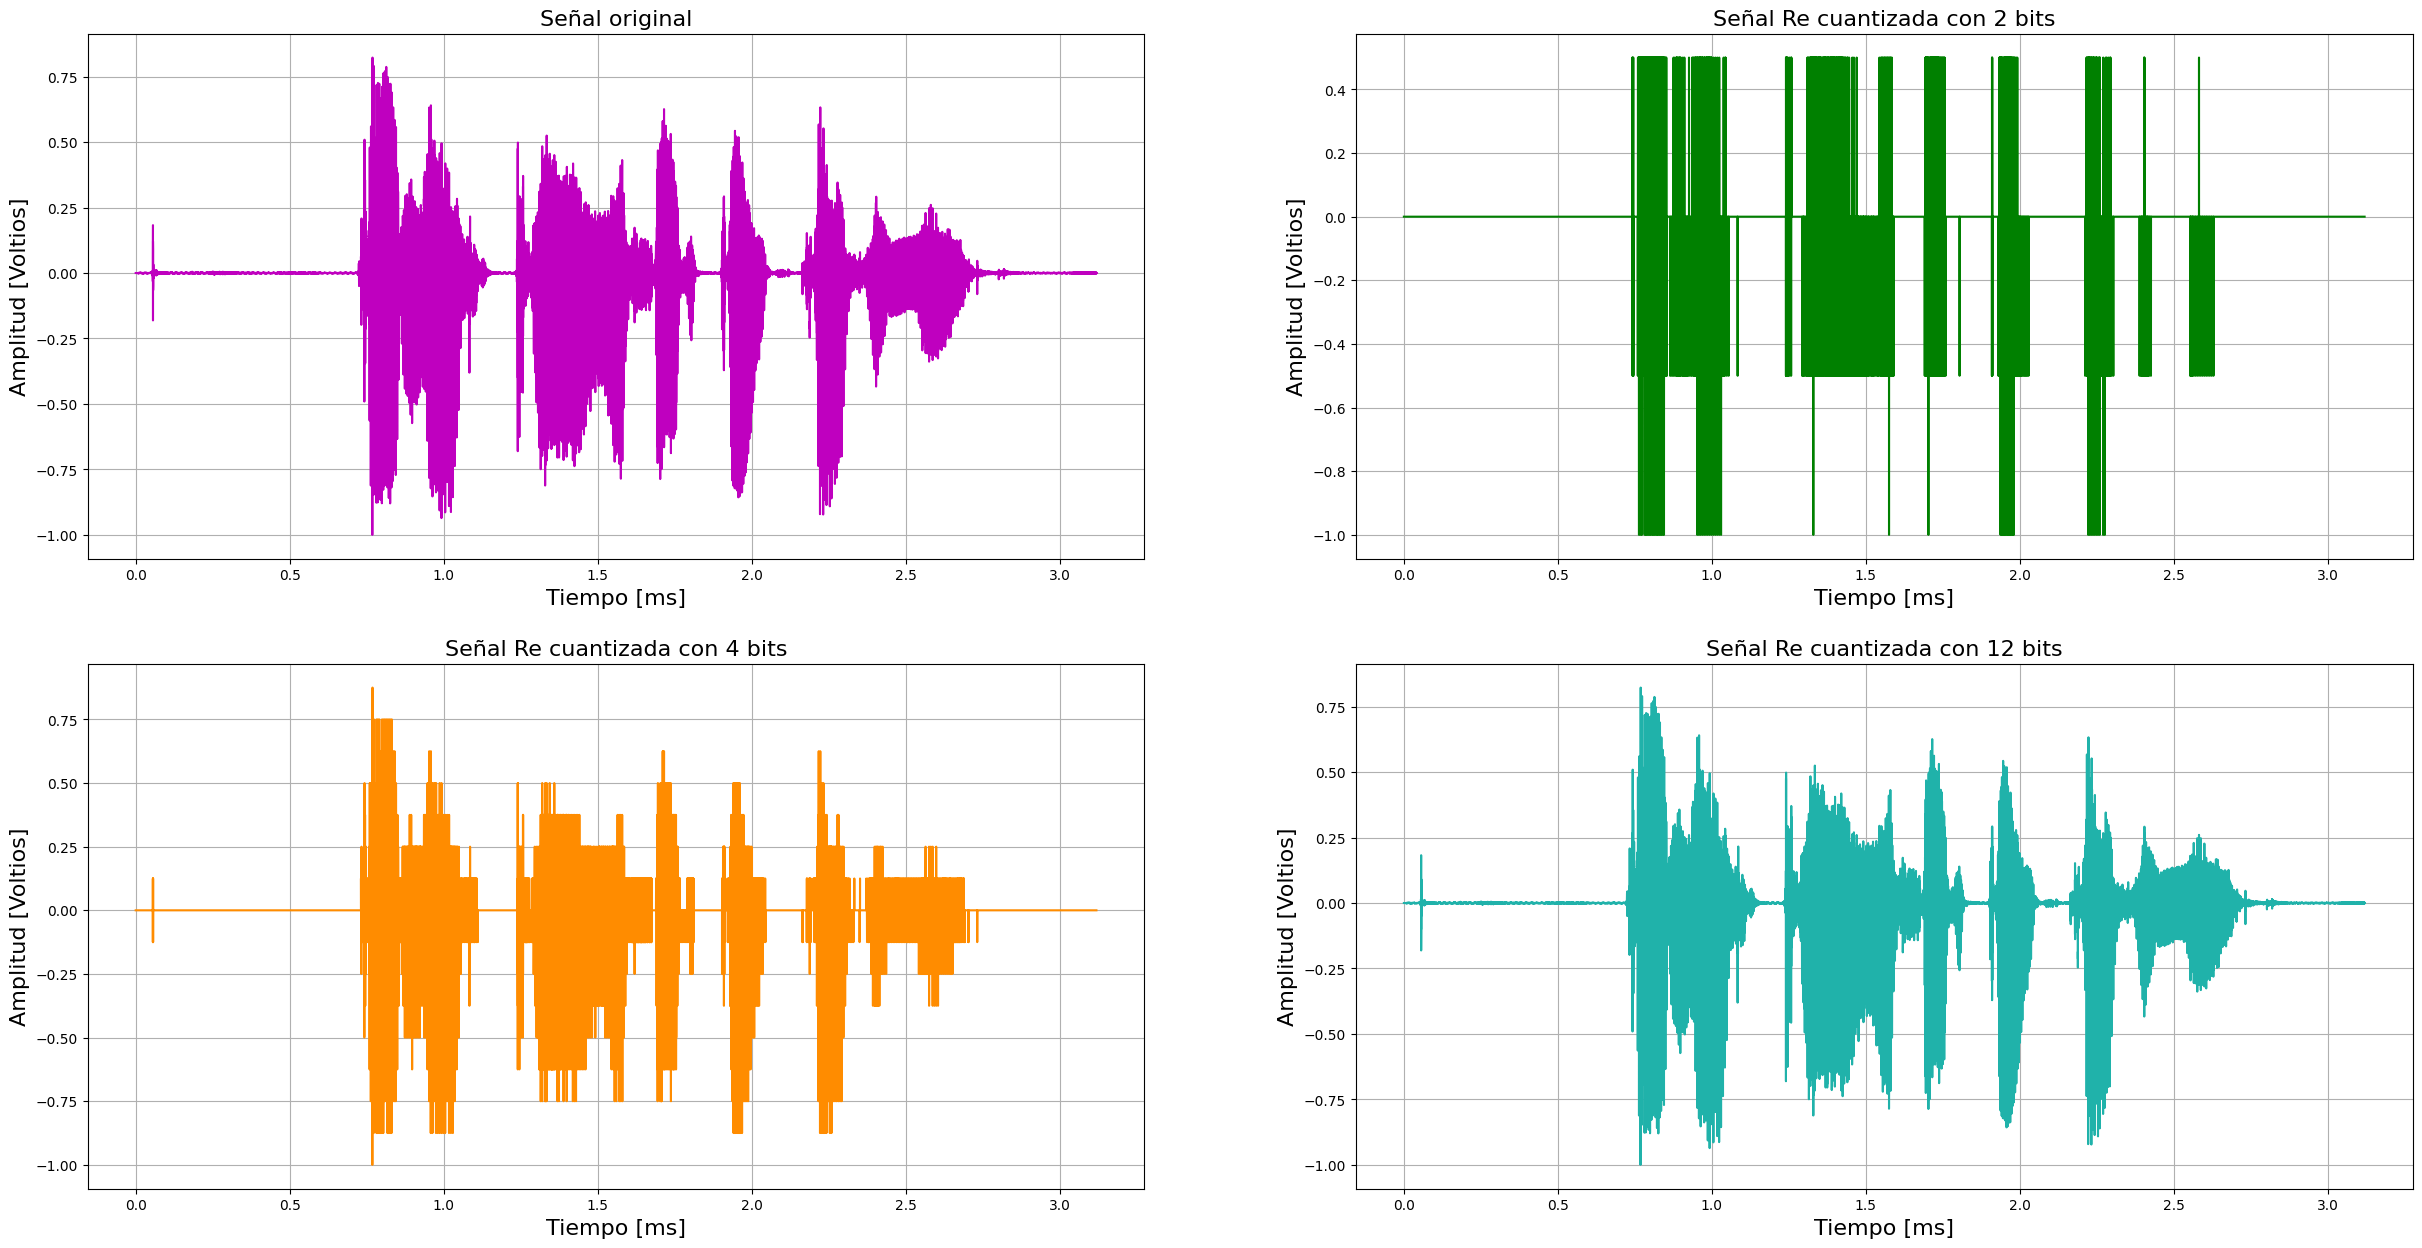

In [ ]:
file_audio=("2.wav") # Ruta del archivo con la senal
fs, x=read(file_audio) # Cargar el archivo
x=x/float(max(abs(x))) # escala la amplitud de la señal
t=np.arange(0, float(len(x))/fs, 1.0/fs) # Vector de tiempo

x2 = fxquant(x,2)  #Se aplica la función para 2 bits
x4 = fxquant(x,4) #Se aplica la función para 4 bits
x12 = fxquant(x,12)  #Se aplica la función para 12 bits

#Gráficas

#Gráfica señal original
plt.figure(figsize=(30, 15))
plt.subplot(2, 2, 1)
plt.title('Señal original',fontsize=16)
plt.xlabel('Tiempo [ms]',fontsize=16)
plt.ylabel('Amplitud [Voltios]',fontsize=16)
plt.plot(t,x, color = 'm')
plt.grid()

#Gráfica señal 2
plt.subplot(2, 2, 2)
plt.title('Señal Re cuantizada con 2 bits',fontsize=16)
plt.xlabel('Tiempo [ms]',fontsize=16)
plt.ylabel('Amplitud [Voltios]',fontsize=16)
plt.plot(t, x2, color ='g')
plt.grid()

#Gráfica señal 4
plt.subplot(2, 2, 3)
plt.title('Señal Re cuantizada con 4 bits',fontsize=16)
plt.xlabel('Tiempo [ms]',fontsize=16)
plt.ylabel('Amplitud [Voltios]',fontsize=16)
plt.plot(t, x4, color ='darkorange')
plt.grid()

#Gráfica señal 12
plt.subplot(2, 2, 4)
plt.title('Señal Re cuantizada con 12 bits',fontsize=16)
plt.xlabel('Tiempo [ms]',fontsize=16)
plt.ylabel('Amplitud [Voltios]',fontsize=16)
plt.plot(t, x12, color ='lightseagreen')
plt.grid()

plt.show()

In [ ]:
print('Audio señal re cuantizada 2 bits')
Audio(x2, rate=fs) #Se escucha la señal Re-cuantizada


Audio señal re cuantizada 2 bits


In [ ]:
print('Audio señal re cuantizada 2 bits')
Audio(x4, rate=fs) #Se escucha la señal Re-cuantizada

Audio señal re cuantizada 2 bits


In [ ]:
print('Audio señal re cuantizada 2 bits')
Audio(x12, rate=fs) #Se escucha la señal Re-cuantizada

Audio señal re cuantizada 2 bits


 **¿Que pudo notar?.**

 Al tomar menos cantidad de bits la señal se distorciona y el audio aunque es entendible se escucha con mucho ruido, al ir aumentando los bits la señal se va pareciendo más a la original y se puede escuchar el audio con claridad, esto se puede evidenciar al comparar la gráfica de la señal original con la señal re cuantizada a 12 bits, en las que se observan que son casi iguales.

#5. Transmision Analógica vs. Digital

#5.1.

1. Cargue la señal de audio correspondiente al ultimo número de su cédula

In [ ]:
file_audio=("2.wav") # Ruta del archivo con la senal
fs, x=read(file_audio) # Cargar el archivo

2.
Para obtener la señal analógica, normalice el audio en amplitud y luego re-escale en un factor de 460.
Use el siguiente código como ayuda.


In [ ]:
x = x/float(np.max(np.abs(x)))
norm = 1.0 / np.max( np.abs( x ) )
sA = 460.0 * x * norm
sdigital = np.round(sA) #Señal digital

4.
Para ver las diferencias entre la señal analógica y digital grafique, en una misma figura (subplot), 100
muestras intermedias de cada señal. ¿Se puede observar y escuchar alguna diferencia entre las señales?

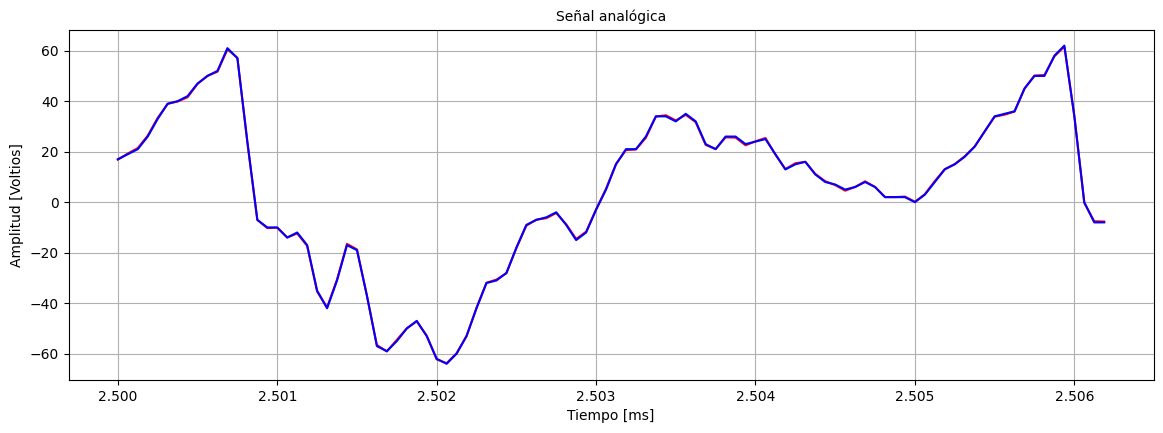

In [ ]:
# t=np.arange(len(sA)) # Vector de tiempo.
t=np.arange(0, float(len(x))/fs, 1.0/fs)
# td=np.arange(len(sdigital))# Vector de tiempo.


#Gráfica señal 1
plt.figure(figsize=(14, 10))
plt.subplot(2, 1, 1)
plt.title('Señal analógica',fontsize=10)
plt.xlabel('Tiempo [ms]',fontsize=10)
plt.ylabel('Amplitud [Voltios]',fontsize=10)
plt.plot(t[40000:40100],sA[40000:40100], color = 'r')
plt.grid()

#Gráfica señal 2
#plt.subplot(2, 1, 2)
#plt.title('Señal digital',fontsize=10)
plt.xlabel('Tiempo [ms]',fontsize=10)
plt.ylabel('Amplitud [Voltios]',fontsize=10)
plt.plot(t[40000:40100],sdigital[40000:40100], color = 'b')

plt.show()




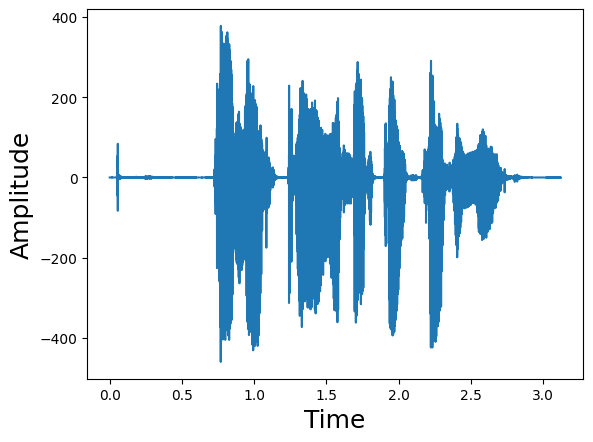

In [ ]:
from scipy.io.wavfile import read # libreria para lectura de archivos de audio

from IPython.display import Audio # para escuchar la senal

import numpy as np

import matplotlib.pyplot as plt

file_audio=('2.wav') # Ruta del archivo con la senal

fs, x=read(file_audio) # Cargar el archivo

x=x/float(max(abs(x))) # escala la amplitud de la senal

norm = 1.0 / np.max( np.abs( x ) )

sA = 460.0 * x * norm

sD = np.round(sA)

t=np.arange(0, float(len(x))/fs, 1.0/fs) # Vector de tiempo

# plt.plot(t,sA) # Dibujar la grafica
plt.plot(t,sD)
# Los siguientes dos comandos dibujan las etiquetas de los ejes
plt.xlabel('Time',fontsize=18) # Etiqueta eje X
plt.ylabel('Amplitude',fontsize=18) # Etiqueta eje Y
plt.show() # Mostrar la grafica

100


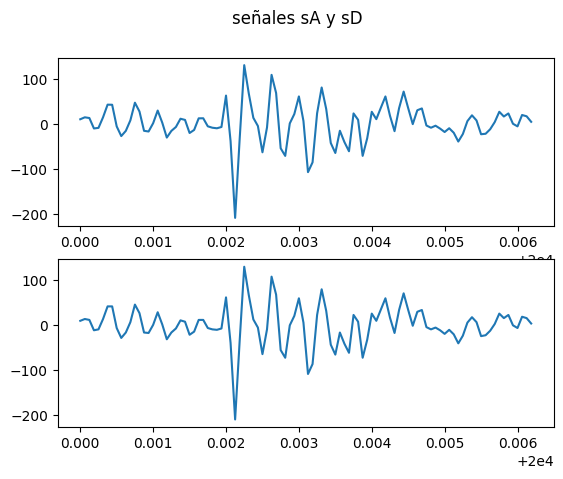

In [ ]:
t=np.arange(20000, 20000+100*(1/fs), 1.0/fs) # Vector de tiempo

print(len(t))
norm = 1.0 /np.max(np.abs( x ))
sA = 460.0 * x * norm

sD=np.round(sA)

fig, axs = plt.subplots(2)
fig.suptitle('señales sA y sD')
axs[0].plot(t, sA[20000:20100])
axs[1].plot(t, sD[20000:20100])
plt.show() # Mostrar la grafica

¿Se puede observar y escuchar alguna diferencia entre las señales?
hay una pequeña diferencia en algunos puntos de la señal

#5.2. Transmisión

#1.1
Use la función llamada repeater(...) que recibe como entrada la señal a transmitir, la amplitud del
ruido que se desea agregar y la constante de atenuacion. Esta funcion retorna la señal afectada por el
ruido, atenuada, y amplificada nuevamente.

In [ ]:
def repeater (x , noise_amplitude , attenuation ) :
    x = x * attenuation
    Noise = np.random.uniform( - noise_amplitude , noise_amplitude , len( x ) )
    x = x + Noise
    x = x / attenuation
    return x

#2.2
La transmision analoga no es mas que una secuencia de repetidores, la cual puede ser implementada
con la siguiente funcion.

In [ ]:
def analog_tx (x , num_repeaters , noise_amplitude , attenuation ) :
    for n in range (0 , num_repeaters ) :
        x = repeater (x , noise_amplitude , attenuation )
    return x

#2.3
En el caso de la señal digital, comunmente se vuelve a cuantificar la senal despues de cada repetidor, ya
que sabemos que en este caso solo tenemos valores enteros, esto es implementado a partir de la siguiente
funcion

In [ ]:
def digital_tx (x , num_repeaters , noise_amplitude , attenuation ) :
    for n in range (0 , num_repeaters ) :
        x = np . round ( repeater (x , noise_amplitude , attenuation ) )
    return x

#2.4
 Compare los esquemas de transmisión de las señales. Para ello defina el número de repetidores en 150, la
amplitud del ruido 0.15, y la constante de atenuación en 0.35. Luego realice la transmisión de las señal
análoga y digital en cada uno de sus respectivos esquemas de transmisión, y calcule la relación señal a ruido
(SNR) tanto para la señal análoga como digital. Escuche ambas señales luego de la transmisión.

In [ ]:
def SNR ( noisy , original ) :
    # power of the error
    err = np . var ( original - noisy )
    # power of the signal
    sig = np . var ( original )
    # SNR in dBs
    return 10 * np . log10 ( sig / err )

In [ ]:
num_repeaters=150 #Número de repetidores
noise_amplitude=0.15 #Amplitud del ruido
attenuation=0.35 #Constante de atenuación

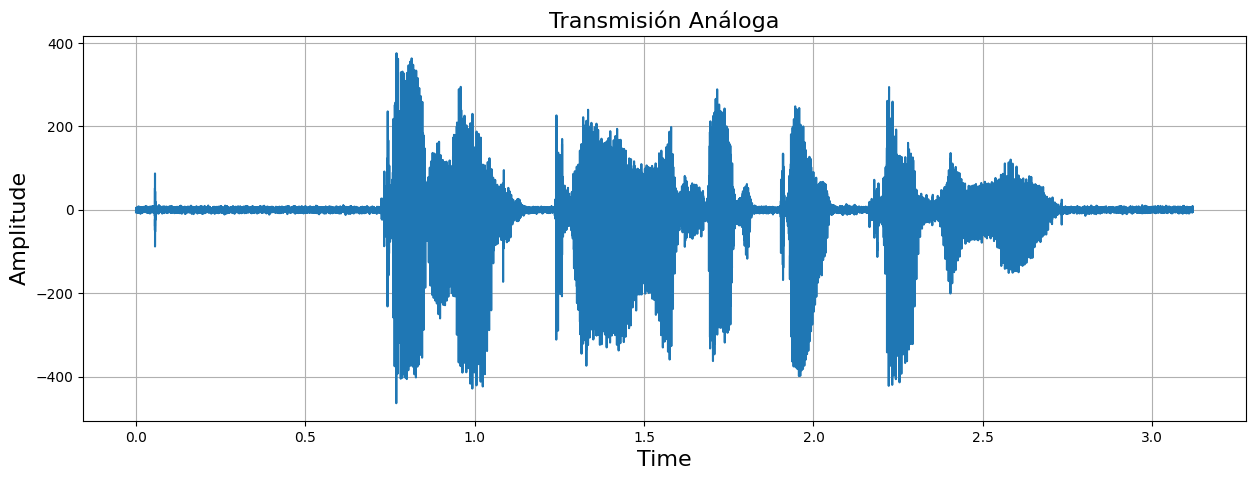

In [ ]:
#Transmisión de señal análogica
analog=analog_tx(sA,num_repeaters,noise_amplitude,attenuation)
t=np.arange(0, float(len(analog))/fs, 1.0/fs) # Vector de tiempo

#Se imprime la señal transmitida análogamente
plt.figure(figsize=(15,5))
plt.title('Transmisión Análoga',fontsize=16)
plt.xlabel('Time',fontsize=16)
plt.ylabel('Amplitude',fontsize=16)
plt.plot(t,analog)
plt.grid()
plt.show()

In [ ]:
Audio(analog, rate=fs)

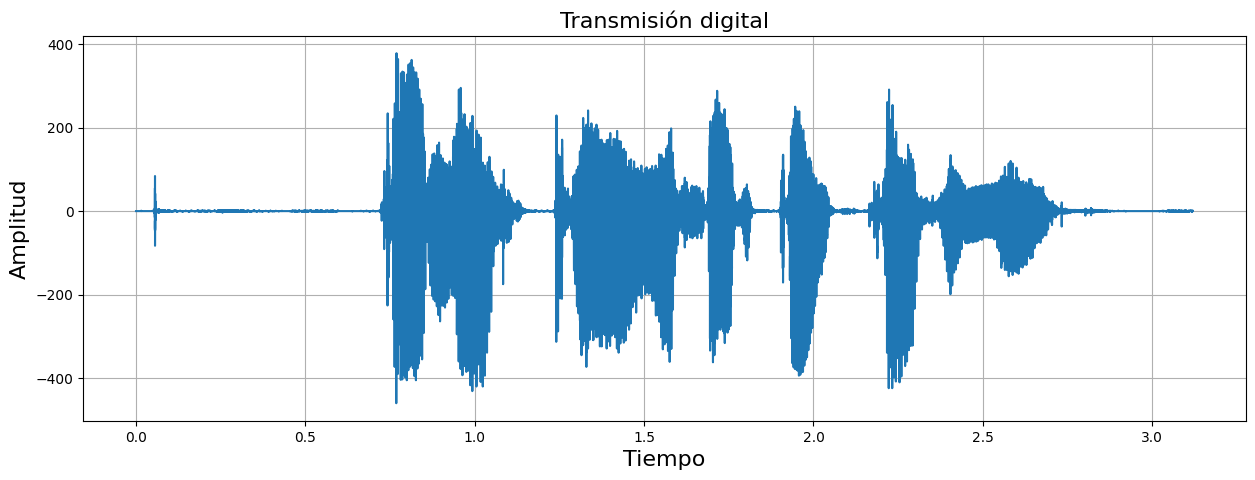

In [ ]:
#Transmision de señal digital
digi=digital_tx(sdigital,num_repeaters,noise_amplitude,attenuation)
t=np.arange(0, float(len(analog))/fs, 1.0/fs) # Vector de tiempo

#Se imprime la señal transmitida análogamente
plt.figure(figsize=(15,5))
plt.title('Transmisión digital',fontsize=16)
plt.xlabel('Tiempo',fontsize=16)
plt.ylabel('Amplitud',fontsize=16)
plt.plot(t,digi)
plt.grid()
plt.show()

In [ ]:
Audio(digi, rate=fs)

In [ ]:
SNRA=SNR(analog,sA)
SNRD=SNR(digi,sA)
print('Relación señal a ruido señal analógica: ',SNRA,"dB")
print('Relación señal a ruido señal digital:   ' ,SNRD,"dB")

Relación señal a ruido señal analógica:  25.284706947732435 dB
Relación señal a ruido señal digital:    46.239741952725815 dB


Al escuchar ambos audios se percibe que en el de la señal digital no hay tantos ruidos de fondo

Manteniendo constantes la amplitud de ruido y la atenuacion, realice un barrido del numero de repetidores entre 10 y 100 (no lo haga de 1 en 1). Para cada iteracion realice la transmision analoga y digital
y calcule la SNR para cada una. Al final grafique la SNR en funci´on del numero de repetidores. ¿Que
diferencia encuentra entre las graficas obtenidas?


SNR Análogica con  10 repetidores es: 37.062149924493404

SNR Análogica con  20 repetidores es: 34.06792698360207

SNR Análogica con  30 repetidores es: 32.27755954283741

SNR Análogica con  40 repetidores es: 31.01212363647697

SNR Análogica con  50 repetidores es: 30.061225021211317

SNR Análogica con  60 repetidores es: 29.31179033564994

SNR Análogica con  70 repetidores es: 28.659143182441987

SNR Análogica con  80 repetidores es: 28.042362040246594

SNR Análogica con  90 repetidores es: 27.518663755855645

SNR Análogica con  100 repetidores es: 27.073535626884322



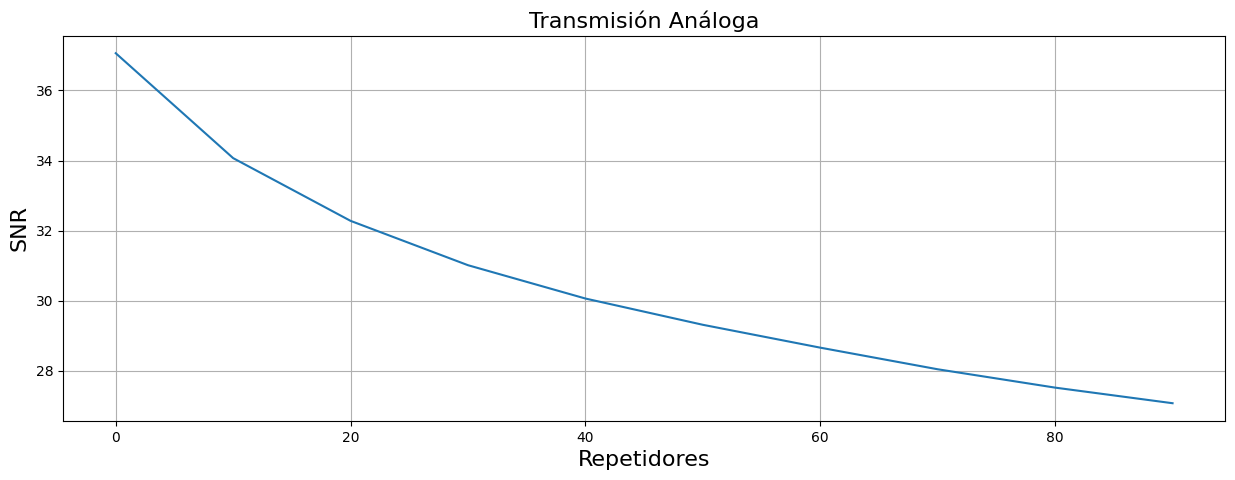

In [ ]:
sn =[] #lista para guardar SNR
for i in range(10,101,10):# barrido de repetidores
    analog=analog_tx(sA,i,noise_amplitude,attenuation)

    cal_A = SNR(analog,sA) #calcula el valor SNR
    sn.append(cal_A)
    print('SNR Análogica con ' f" {i} " 'repetidores es: ' f"{cal_A}\n")

repet = np.arange (0,100,10) #Se crea un vector de repetidores
plt.figure(figsize=(15,5))
plt.title('Transmisión Análoga',fontsize=16)
plt.xlabel('Repetidores',fontsize=16)
plt.ylabel('SNR',fontsize=16)
plt.plot(repet,sn)
plt.grid()

SNR digital con  10 repetidores es: 46.239741952725815

SNR digital con  20 repetidores es: 46.239741952725815

SNR digital con  30 repetidores es: 46.239741952725815

SNR digital con  40 repetidores es: 46.239741952725815

SNR digital con  50 repetidores es: 46.239741952725815

SNR digital con  60 repetidores es: 46.239741952725815

SNR digital con  70 repetidores es: 46.239741952725815

SNR digital con  80 repetidores es: 46.239741952725815

SNR digital con  90 repetidores es: 46.239741952725815

SNR digital con  100 repetidores es: 46.239741952725815



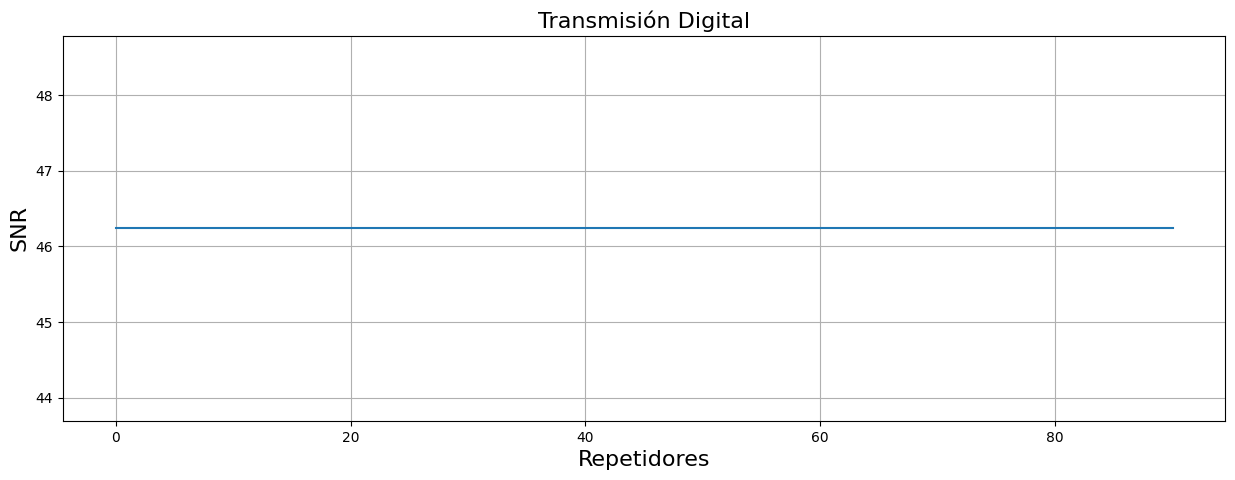

In [ ]:
snd =[] #lista para guardar SNR
for j in range(10,101,10):# barrido de repetidores
    digi=digital_tx(sdigital,j,noise_amplitude,attenuation)

    cal_D = SNR(digi,sA) #calcula el valor SNR
    snd.append(cal_D)
    print('SNR digital con ' f" {j} " 'repetidores es: ' f"{cal_D}\n")

repe = np.arange(0,100,10) #Se crea un vector de repetidores
plt.figure(figsize=(15,5))
plt.title('Transmisión Digital',fontsize=16)
plt.xlabel('Repetidores',fontsize=16)
plt.ylabel('SNR',fontsize=16)
plt.plot(repe,snd)
plt.grid()

en la señal digital se observa que la relación señal a ruido permanece constante esto se da porque el ruido durante el proceso se va eliminando.

#Conclusiones

* Aumentar o disminuir la frecuencia de muestreo afecta la velocidad con la cual se reproduce el audio, ya que esta determina
la cantidad de pasos que se toman a la hora de realizar un muestreo.

* La fs y la velocidad de reproducción son directamete proporcionales.

* Como la frecuencia de Nyquist es dos veces menor a la Tasa de Nyquist (frecuencia de muestreo), cuando esto se cumple es posible reconstruir la señal y cuando se toman muestras a menores frecuencias que la frecuencia de Nyquist, la información se pierde y no es posible reconstruir la señal.

* Entre mas bits se utilice en la re-cuantización más cerca se encuentran las señales de la original.

* Al pasar la señal por varios repetidores el ruido se va acumulando y en el proceso de digitalizacion el ruido se va eliminando y la señal se reconstruye